In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shared.utils.helpers import save_figure, get_figure_size
from shared.utils.config import (
    organics, solvent_order, fig_width_cm,
    vmin, vmax, cmap_choice, bar_palette_organics, bar_palette_solvents  # NOTE: bar_palette must be defined in config
)
from shared.utils.plot_styles import set_plot_style

# Set consistent plot style
set_plot_style()

# Load processed etch stability data
df = pd.read_csv("../data/processed/etch_stability_summary.csv")

# Define inorganic to metal label map
precursor_to_metal = {'TMA': 'Al', 'DEZ': 'Zn'}
precursors = ['TMA', 'DEZ']  # fixed order

# Enforce solvent and organic precursor order
df['Solvent'] = pd.Categorical(df['Solvent'], categories=solvent_order, ordered=True)
df['Organic'] = pd.Categorical(df['Organic'], categories=organics, ordered=True)

# Clip low values to improve visibility
df = df.copy()
df['Normalized Thickness'] = df['Normalized Thickness'].clip(lower=0.01)

# Compute dynamic y-limit
ymax = df['Normalized Thickness'].max() * 1.1



Saved Fig4a_Heatmap_EtchStability as ('png', 'pdf')


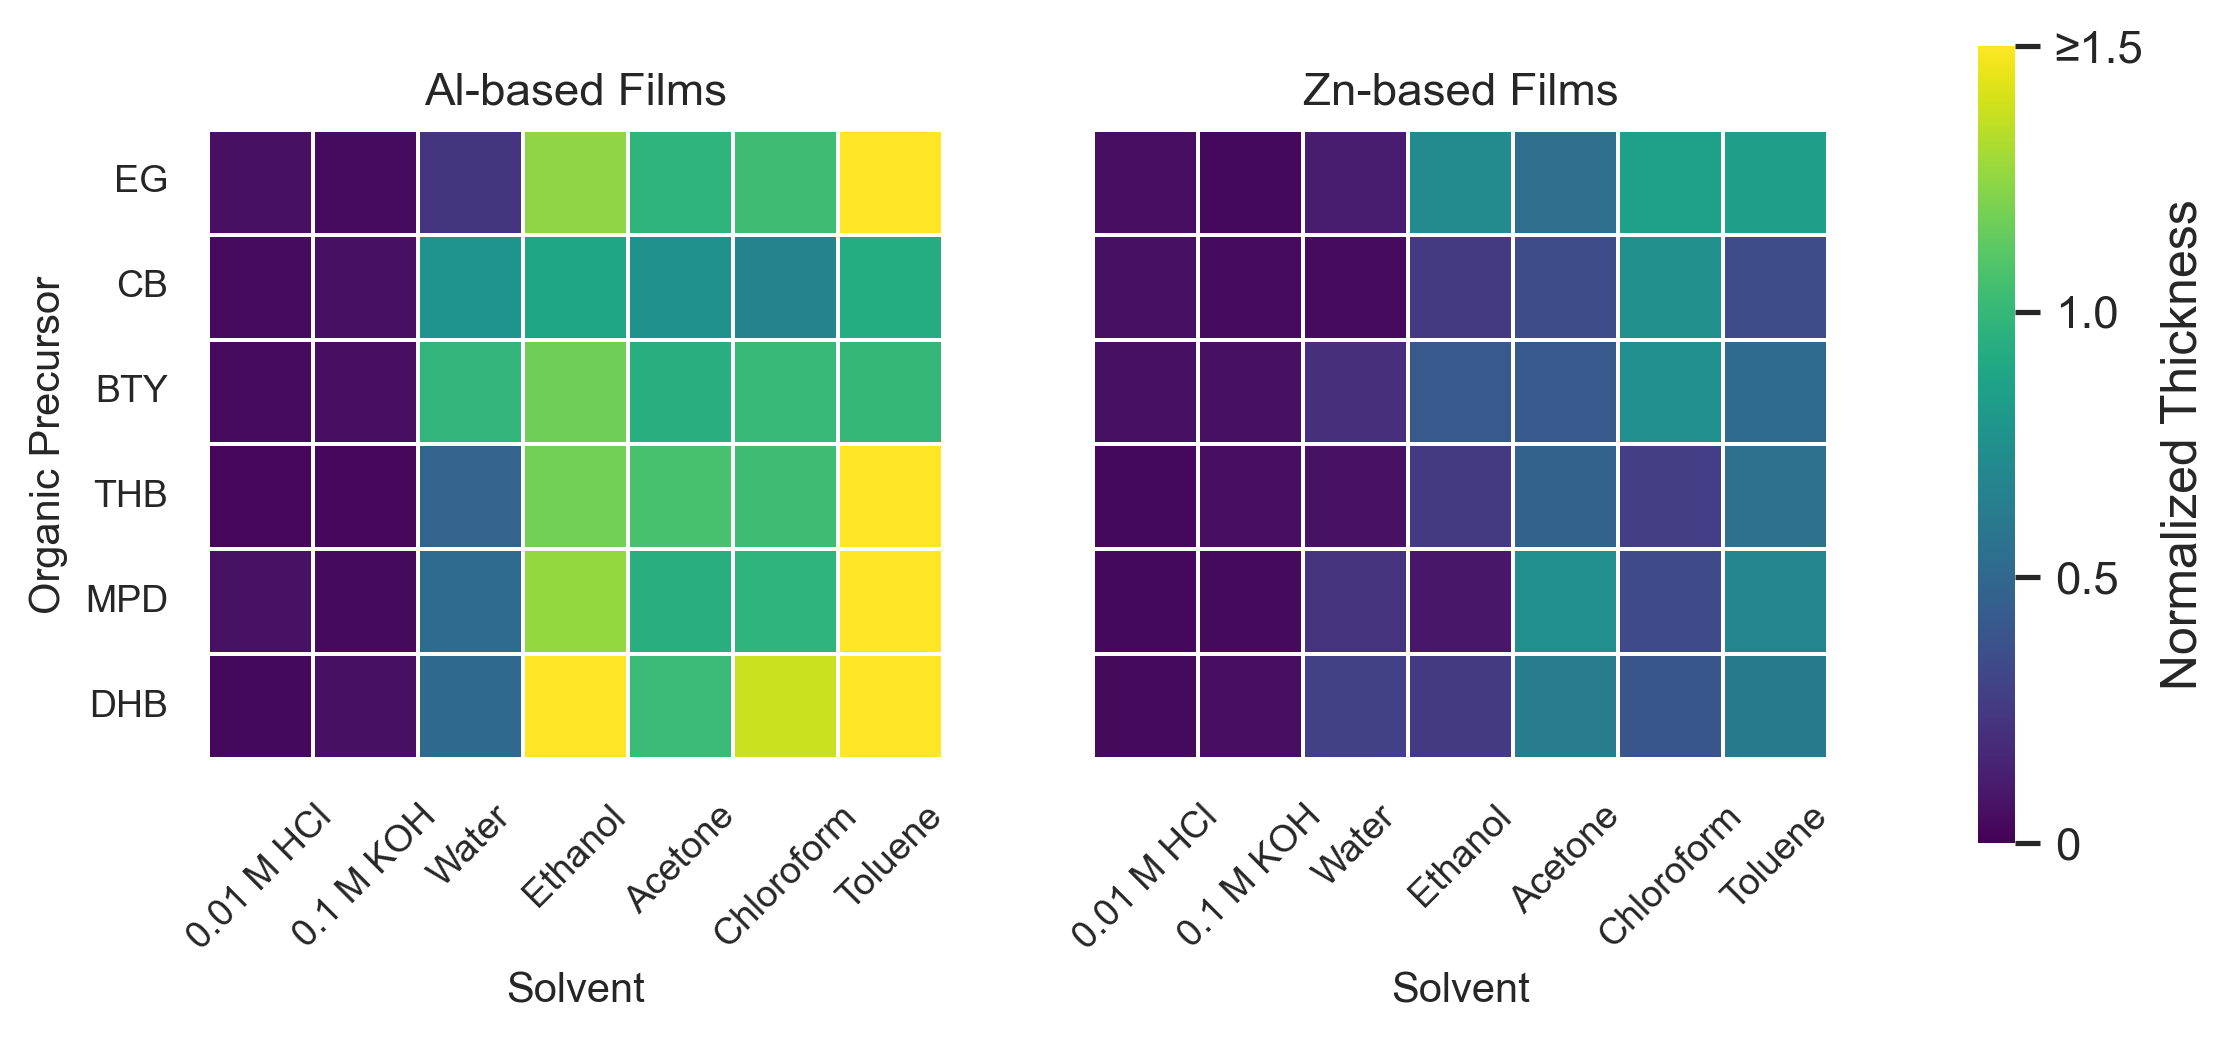

In [6]:
import matplotlib.gridspec as gridspec

# Create a 1x3 grid: two plots + one colorbar
fig = plt.figure(figsize=get_figure_size(fig_width_cm, aspect_ratio=2/1))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.3)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
cbar_ax = fig.add_subplot(gs[2])

# Loop over each precursor
for idx, (precursor, ax) in enumerate(zip(precursors, [ax1, ax2])):
    metal = precursor_to_metal.get(precursor, precursor)
    subset = df[df['Inorganic'] == precursor]

    pivot = subset.pivot_table(
        index='Organic',
        columns='Solvent',
        values='Normalized Thickness',
        aggfunc='mean'
    ).reindex(index=organics, columns=solvent_order).fillna(0)

    sns.heatmap(
        pivot,
        cmap=cmap_choice,
        vmin=vmin, vmax=vmax,
        annot=False, linewidths=0.5, square=True,
        cbar=(idx == 1),
        cbar_ax=cbar_ax if idx == 1 else None,
        ax=ax
    )

    ax.set_title(f"{metal}-based Films", fontsize=11)
    ax.set_xlabel("Solvent", fontsize=10)

    if idx == 0:
        ax.set_ylabel("Organic Precursor", fontsize=10)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis="x", rotation=45, labelsize=9)
    ax.tick_params(axis="y", labelsize=9)

# Format the shared colorbar
cbar_ax.set_ylabel('Normalized Thickness')
cbar_ax.set_yticks([0, 0.5, 1.0, 1.5])
cbar_ax.set_yticklabels(['0', '0.5', '1.0', '≥1.5'])

# Use manual layout adjustment to avoid tight_layout warning
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.15, top=0.9, wspace=0.3)

save_figure(fig, "Fig4a_Heatmap_EtchStability", formats=("png", "pdf"))


Saved Fig4b_Barplot_EtchStability as ('png', 'pdf')


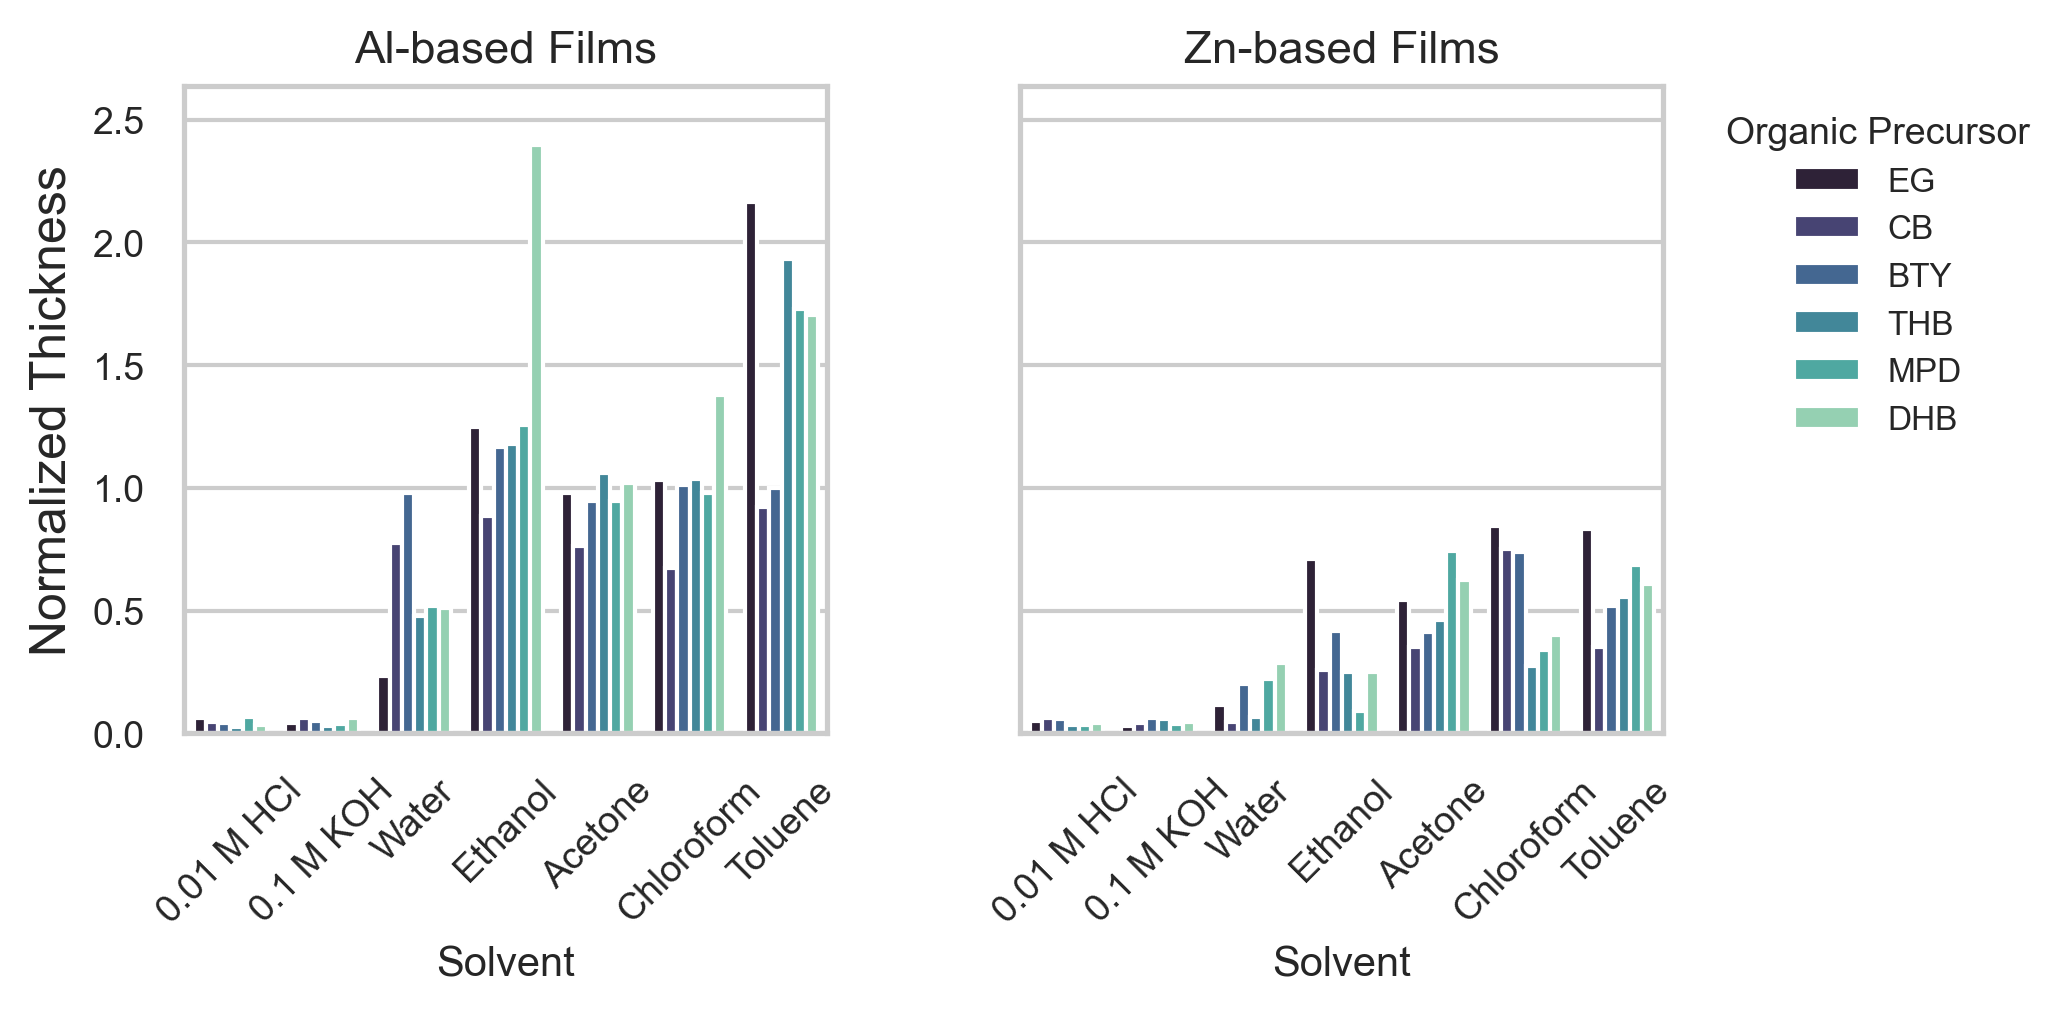

In [3]:
fig, axes = plt.subplots(1, 2, figsize=get_figure_size(fig_width_cm, aspect_ratio=2/1), sharey=True)

for idx, precursor in enumerate(precursors):
    ax = axes[idx]
    metal = precursor_to_metal.get(precursor, precursor)
    subset = df[df['Inorganic'] == precursor]

    sns.barplot(
        data=subset,
        x='Solvent', y='Normalized Thickness',
        hue='Organic',
        hue_order=organics,
        ax=ax,
        palette=bar_palette_organics
    )

    ax.set_ylim(0, ymax)
    ax.set_title(f"{metal}-based Films", fontsize=11)
    ax.set_xlabel("Solvent", fontsize=10)
    ax.set_ylabel("Normalized Thickness" if idx == 0 else "")
    ax.tick_params(axis="x", rotation=45, labelsize=9)
    ax.tick_params(axis="y", labelsize=9)

    if idx == 1:
        ax.legend(title='Organic Precursor', fontsize=8, title_fontsize=9, loc='upper left', bbox_to_anchor=(1.05, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
save_figure(fig, "Fig4b_Barplot_EtchStability", formats=("png", "pdf"))


Saved Fig4c_BarplotOrganicGroupedBySolvent as ('png', 'pdf')


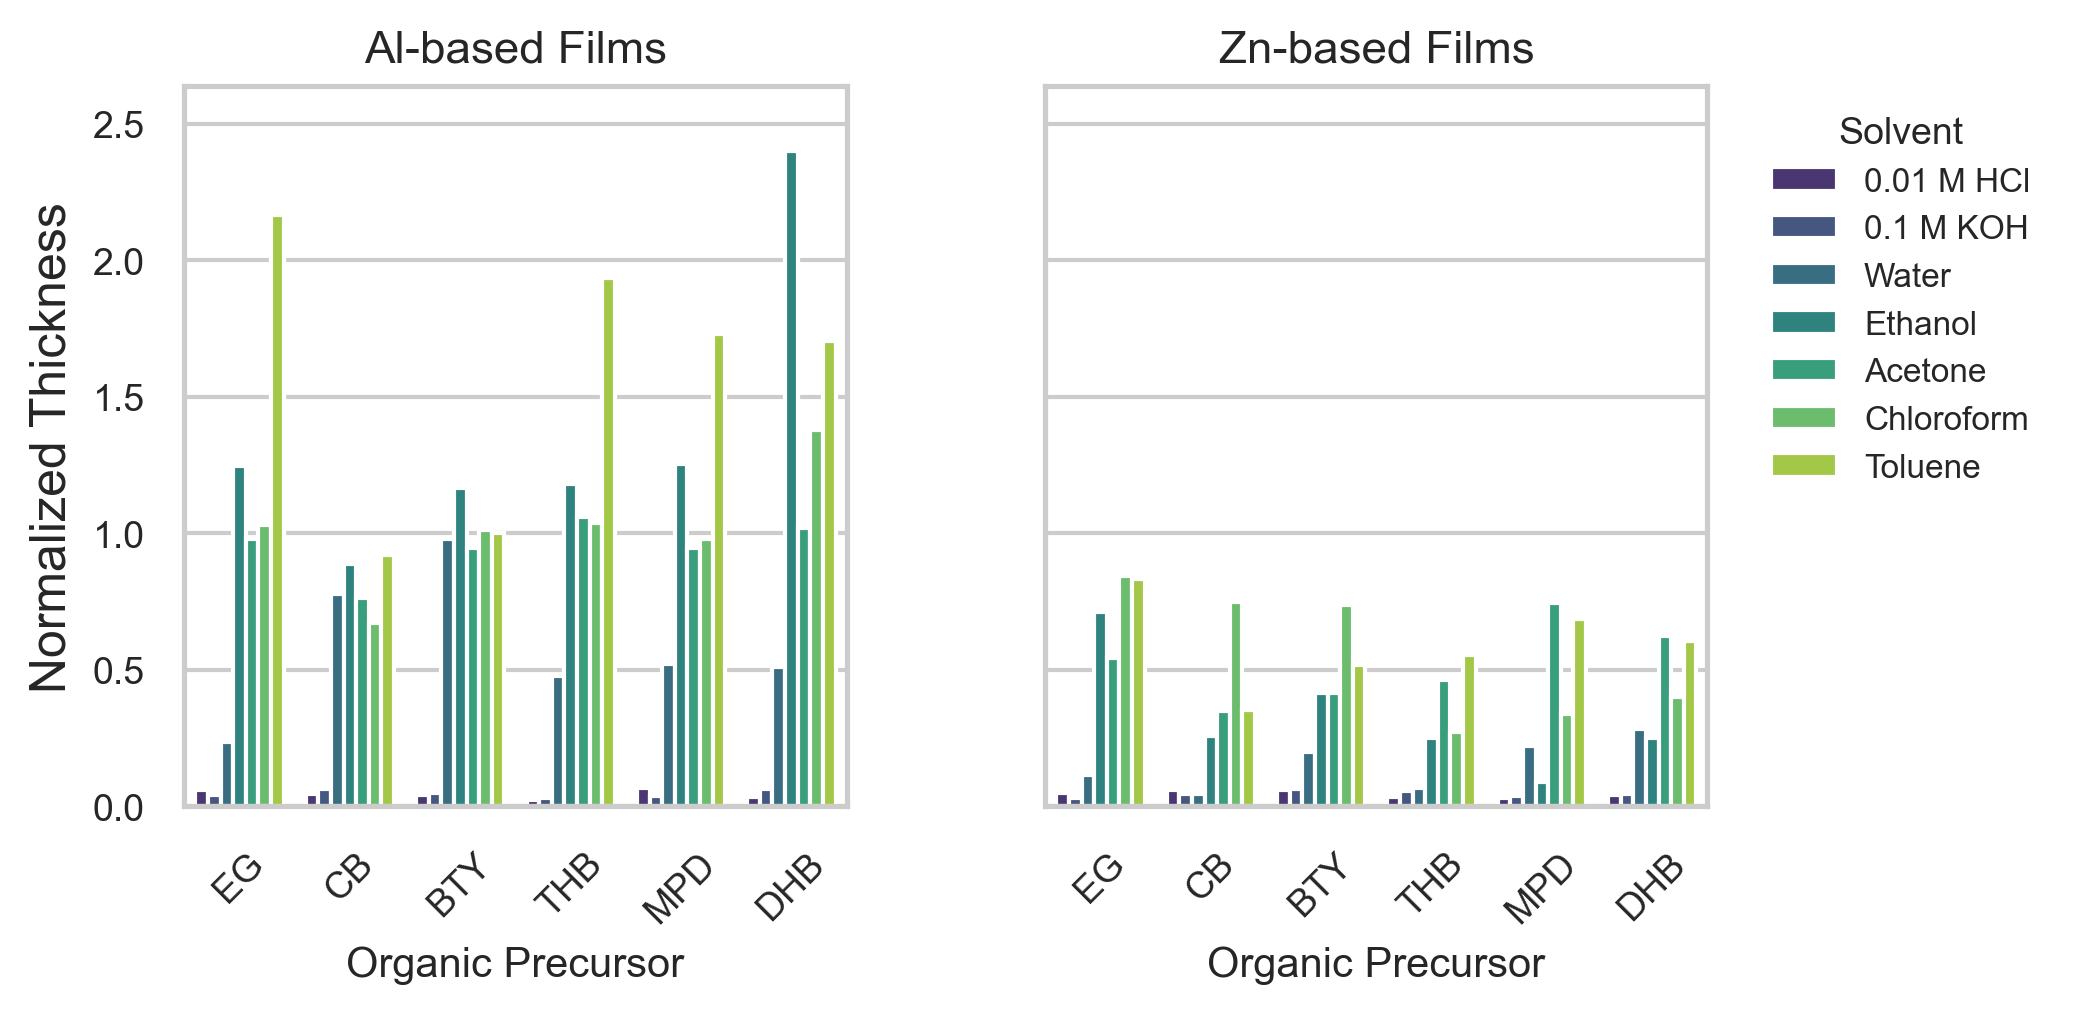

In [4]:
fig, axes = plt.subplots(1, 2, figsize=get_figure_size(fig_width_cm, aspect_ratio=2/1), sharey=True)

for idx, precursor in enumerate(precursors):
    ax = axes[idx]
    metal = precursor_to_metal.get(precursor, precursor)
    subset = df[df['Inorganic'] == precursor]

    sns.barplot(
        data=subset,
        x='Organic', y='Normalized Thickness',
        hue='Solvent',
        order=organics,
        hue_order=solvent_order,
        ax=ax,
        palette=bar_palette_solvents
    )

    ax.set_ylim(0, ymax)
    ax.set_title(f"{metal}-based Films", fontsize=11)
    ax.set_xlabel("Organic Precursor", fontsize=10)
    ax.set_ylabel("Normalized Thickness" if idx == 0 else "")
    ax.tick_params(axis="x", rotation=45, labelsize=9)
    ax.tick_params(axis="y", labelsize=9)

    if idx == 1:
        ax.legend(title='Solvent', fontsize=8, title_fontsize=9, loc='upper left', bbox_to_anchor=(1.05, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
save_figure(fig, "Fig4c_BarplotOrganicGroupedBySolvent", formats=("png", "pdf"))


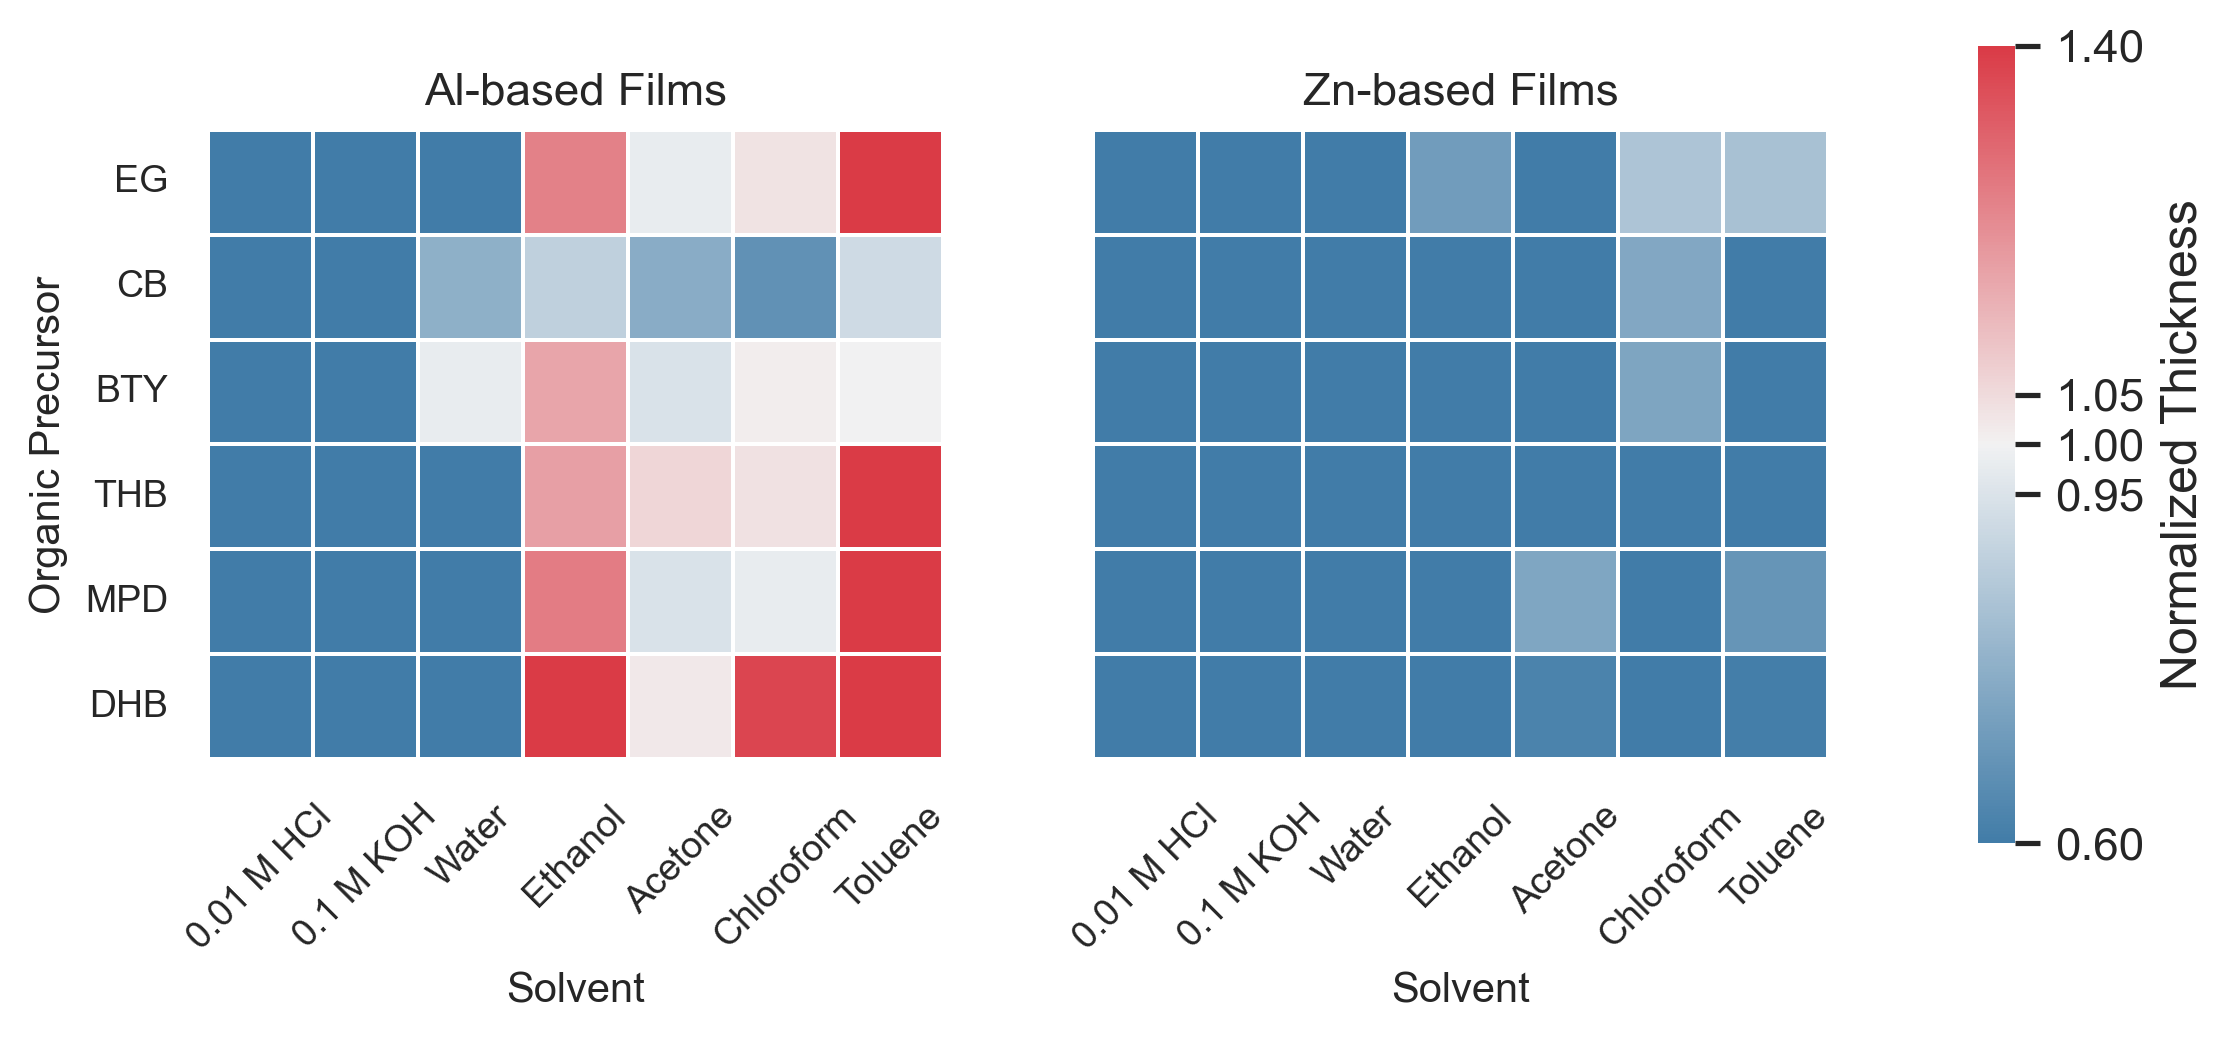

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

# Define diverging colormap centered at 1.0
vmin, vmax = 0.6, 1.4  # adjust based on your actual range
norm = TwoSlopeNorm(vmin=vmin, vcenter=1.0, vmax=vmax)
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create gridspec layout
fig = plt.figure(figsize=get_figure_size(fig_width_cm, aspect_ratio=2/1))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.3)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
cbar_ax = fig.add_subplot(gs[2])

for idx, (precursor, ax) in enumerate(zip(precursors, [ax1, ax2])):
    metal = precursor_to_metal.get(precursor, precursor)
    subset = df[df['Inorganic'] == precursor]

    pivot = subset.pivot_table(
        index='Organic',
        columns='Solvent',
        values='Normalized Thickness',
        aggfunc='mean'
    ).reindex(index=organics, columns=solvent_order).fillna(0)

    sns.heatmap(
        pivot,
        cmap=cmap,
        norm=norm,
        annot=False, linewidths=0.5, square=True,
        cbar=(idx == 1),
        cbar_ax=cbar_ax if idx == 1 else None,
        ax=ax
    )

    ax.set_title(f"{metal}-based Films", fontsize=11)
    ax.set_xlabel("Solvent", fontsize=10)

    if idx == 0:
        ax.set_ylabel("Organic Precursor", fontsize=10)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis="x", rotation=45, labelsize=9)
    ax.tick_params(axis="y", labelsize=9)

# Label the colorbar
cbar_ax.set_ylabel('Normalized Thickness')
cbar_ax.set_yticks([vmin, 0.95, 1.0, 1.05, vmax])
cbar_ax.set_yticklabels([f"{vmin:.2f}", "0.95", "1.00", "1.05", f"{vmax:.2f}"])

# Manual spacing instead of tight_layout
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.15, top=0.9, wspace=0.3)

plt.show()
